In [141]:
### Day 4
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [142]:
energy = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_FY2020.csv')

In [143]:
energy.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [144]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [145]:
energy.shape

(450, 26)

In [146]:
len(energy['Company Name'].unique())

439

In [48]:
# energy_group = energy.groupby('City')['Job created'].value_counts()
# energy_group = energy.groupby('City')
# energy_group.head(600)
# print(energy_group)

In [159]:
Queens_Job = energy[energy['City'] == 'Queens']['Job created'].sum()
Queens_Job


           email
0  aaa@gmail.com
1  bbb@yahoo.com
2    ccc@aol.com
           email     domain
0  aaa@gmail.com  gmail.com
1  bbb@yahoo.com  yahoo.com
2    ccc@aol.com    aol.com


email     object
domain    object
dtype: object

In [214]:
### These three line of codes also work
# var = ['Company Name', 'company email']
# energy_domain = energy[var].dropna()
# energy_domain['domain'] = energy_domain['company email'].str.split('@').str[1]
# energy_domain_unique = energy_domain['domain'].unique()
# energy_domain_unique.shape


### This code also works
# energy_domain_unique = energy_domain['company email'].str.split('@').str[1].unique()
# energy_domain_unique.shape


### This code also works
# energy_domain_unique = energy_domain.groupby('domain').sum()
# energy_domain_unique.shape


### Final Code
energy_domain_unique = energy['company email'].str.split('@').str[1].unique()
energy_domain_unique.shape

(357,)

In [107]:
# NTA = energy['NTA'].value_counts()
# NTA1 = NTA[NTA >= 5]
# NTA1
# NTA1.dtypes
# NTA_frame = NTA.to_frame().rename(columns={0: 'NTA', 1: 'Bussiness_Num'})
# NTA_frame
# NTA

### 
# v = energy.NTA.value_counts()
# NTA1 = energy[energy.NTA.isin(v.index[v.gt(4)])]
# NTA1

In [215]:
### 
NTA = energy[energy.groupby('NTA')['NTA'].transform('size') >= 5]
NTA

### This code also works perfectly fine
# v = energy.NTA.value_counts()
# NTA1 = energy[energy.NTA.isin(v.index[v.gt(4)])] ### get all items which have more than 4 readings
# NTA1



,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,...,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,"William Hird & Co., Inc.",Thomas E. Bury,tebury@hirdco.com,7184994881,255 40th Street,Brooklyn,NY,11232,Manufacturing,Manufacture fire protection systems,...,36644.27,Brooklyn,40.653997,-74.009925,307.0,38.0,2.0,3010468.0,3.007070e+09,Sunset Park West
444,"Williams Sonoma, Inc.",Christine Hickman,CHickman@WSGC.com,7187804442,55 Water Street,Brooklyn,NY,11201,Wholesale/Warehouse/Distribution,high quality products for the home,...,56547.18,Brooklyn,40.703301,-73.992047,302.0,33.0,21.0,3000019.0,3.000260e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South


In [216]:
NTA_Total = NTA.groupby('NTA')['Total Savings'].sum()
NTA_Count = NTA['NTA'].value_counts()
NTA_Avg = NTA_Total/NTA_Count
NTA_Job_Created = NTA.groupby('NTA')['Job created'].sum()

print(NTA_Total.head(25))
print(NTA_Count.head(25))
print(NTA_Avg.head(25))
print(NTA_Job_Created.head(25))



NTA
Battery Park City-Lower Manhattan                   4229017.17
Bushwick South                                       261404.55
Carroll Gardens-Columbia Street-Red Hook             267711.29
College Point                                        120115.61
Crown Heights North                                   36326.69
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     599503.40
East New York                                        435897.84
East Williamsburg                                    153896.89
Greenpoint                                           136551.09
Hunters Point-Sunnyside-West Maspeth                1794854.92
Hunts Point                                          510198.21
Manhattanville                                        24848.00
Maspeth                                               59924.55
Mott Haven-Port Morris                               249815.13
Queensbridge-Ravenswood-Long Island City             989292.33
SoHo-TriBeCa-Civic Center-Little Italy             

In [226]:
# S = energy.groupby('City')['Job created'].sum()
# S.head(600)

### Save NTA datafarme
NTA.to_csv('Value_of_Energy_Cost_Savings_Program_With_NTA_More_Than_Five.csv', index=False)

NTA_data = NTA_Total.to_frame()
NTA_data['Total Bussiness'] = NTA_Count
NTA_data['Job created'] = NTA_Job_Created
NTA_data['Average Saving'] = NTA_Avg
# NTA_data.head()

### Save NTA_data
NTA_data.to_csv('Average_Energy_Cost_Savings_With_NTA_More_Than_Five.csv')

# print(NTA_data)
NTA_data.head()

,Total Savings,Total Bussiness,Job created,Average Saving
NTA,,,,
Battery Park City-Lower Manhattan,4229017.17,9,0.0,469890.796667
Bushwick South,261404.55,10,10.0,26140.455000
Carroll Gardens-Columbia Street-Red Hook,267711.29,11,0.0,24337.390000
College Point,120115.61,7,2.0,17159.372857
Crown Heights North,36326.69,9,0.0,4036.298889


Text(0, 0.5, 'Job created')

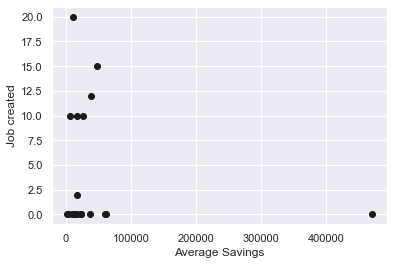

In [224]:
####### DAY 5 ########

plt.plot(NTA_data['Average Saving'], NTA_data['Job created'],'o', color = 'k')
plt.xlabel('Average Savings')
plt.ylabel('Job created')

Text(0, 0.5, 'Job created')

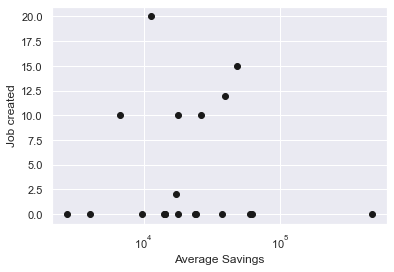

In [225]:
plt.plot(NTA_data['Average Saving'], NTA_data['Job created'],'o', color = 'k')
plt.xscale('log')
plt.xlabel('Average Savings')
plt.ylabel('Job created')

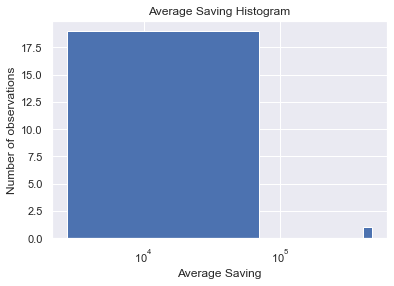

In [230]:
plt.hist(NTA_data['Average Saving'], bins=7)
plt.xscale('log')
# Add some formatting to the plot:
plt.xlabel('Average Saving')
plt.ylabel('Number of observations')
plt.title('Average Saving Histogram');

In [261]:
from datetime import datetime
Date_Job = energy[['Effective Date', 'Job created']]
Date_Job['dt'] = pd.to_datetime(Date_Job['Effective Date'])
Date_Job['month'] = Date_Job['dt'].dt.strftime('%m')
Job_per_month = Date_Job.groupby('month')['Job created'].sum()
Job_per_month

C:\Users\sbsst\AppData\Local\Temp/ipykernel_216768/1053078299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_Job['dt'] = pd.to_datetime(Date_Job['Effective Date'])
C:\Users\sbsst\AppData\Local\Temp/ipykernel_216768/1053078299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_Job['month'] = Date_Job['dt'].dt.strftime('%m')


month
01     0.0
02    27.0
03    20.0
04     2.0
05     2.0
06    63.0
07    20.0
08     0.0
09     0.0
10     0.0
11     5.0
12    10.0
Name: Job created, dtype: float64

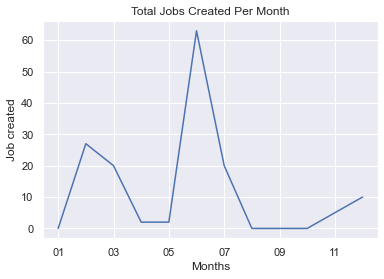

In [262]:
Job_per_month.plot(xlabel='Months',
                       ylabel='Job created',
                       title='Total Jobs Created Per Month');
